# KNN iris 다중분류 (multiclass Classification)
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import warning ...

In [45]:
import sklearn
from sklearn.model_selection import train_test_split

def get_iris(mode=None):
    iris = pd.read_csv("iris.csv")
    df = iris.drop(['Id'], axis=1)
    df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
    
    if (mode=='bin'):
        df = df.loc[df['species']!='Iris-virginica']
        df['species'] = df['species'].map({
                    'Iris-setosa':0,
                    'Iris-versicolor':1})
    else:
        df['species'] = df['species'].map({
                    'Iris-setosa':0,
                    'Iris-versicolor':1,
                    'Iris-virginica':2})
        
    col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    X = df[col]
    y = df['species']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2 , 
                                                    random_state=2022)
    
    mu = X_train.mean()
    std = X_train.std()
    X_train = (X_train - mu) / std
    X_test = (X_test - mu) / std
    
    return X_train, X_test, y_train, y_test


In [46]:
X_train, X_test, y_train, y_test = get_iris()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [47]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

## 학습

In [48]:
from sklearn.neighbors import KNeighborsClassifier

score = []

for i in range(3,30):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    
    s = clf.score(X_train, y_train)
    score.append(s)


C:\Users\006\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\006\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

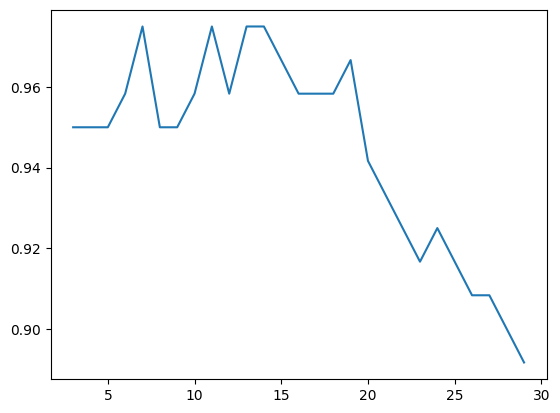

In [49]:
plt.plot(np.arange(3,30), score)
plt.show()

In [57]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train, y_train)

s = clf.score(X_train, y_train)
print('accuracy: ', s)

accuracy:  0.975


C:\Users\006\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## 예측

In [59]:
# 예측
y_pred = clf.predict(X_test)

C:\Users\006\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [63]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
cfm

array([[ 9,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 12]], dtype=int64)

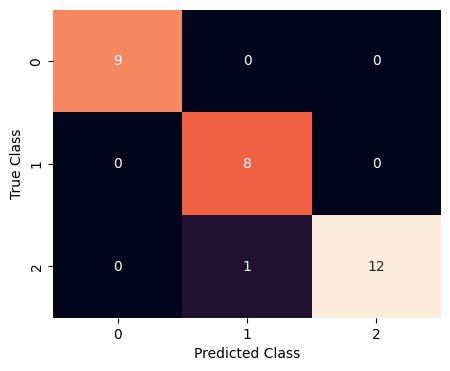

In [64]:
plt.figure(figsize=(5,4))
sns.heatmap(cfm, annot=True, cbar=False, fmt='d')
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [74]:
## 평가지표 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_score(y_true, y_pred, average='binary'):

    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred, average=average)
    # 기본이 이진분류이므로 설정을 바꿔주어야 함
    rec = recall_score(y_true, y_pred, average=average)

    print("accuracy:", acc)
    print("precision:", pre)
    print("recall:", rec)

In [75]:
print_score(y_test, y_pred, average='macro')

accuracy: 0.9666666666666667
precision: 0.9629629629629629
recall: 0.9743589743589745
